In [2]:
# Dependencies
from pathlib import Path
import hvplot.pandas
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from ApiKeys import geoapify_key

In [3]:
covid_csv_path_2020 = Path("Resources/covid19_vaccine_2021-02-19.csv")
covid_total_df_2020 = pd.read_csv(covid_csv_path_2020)
# covid_total_df_2020

In [4]:
covid_county_cleaned_2020 = covid_total_df_2020[["section", "metric", "category", "date", "value"]]

covid_county_cleaned_2020 = covid_county_cleaned_2020[covid_county_cleaned_2020['section'] == 'County-level Data']
covid_county_cleaned_2020 = covid_county_cleaned_2020[covid_county_cleaned_2020['category'] == 'Doses Administered']

covid_county_cleaned_2020['date'].fillna(2020, inplace=True)

covid_county_cleaned_2020.dropna()

unwanted_other = 'Other'
unwanted_other_row = covid_county_cleaned_2020['metric'] == unwanted_other
covid_county_cleaned_2020 = covid_county_cleaned_2020[~unwanted_other_row]

covid_county_cleaned_2020['metric'] = covid_county_cleaned_2020['metric'].str.replace(' County', '')

#covid_county_cleaned_2020

covid_county_sorted_2020 = covid_county_cleaned_2020.sort_values(by='metric', ascending=True)

covid_county_sorted_2020 = covid_county_sorted_2020[["metric", "category", "date", "value"]]

covid_county_sorted_2020

,metric,category,date,value
704,Adams,Doses Administered,2020,76149.0
705,Alamosa,Doses Administered,2020,4335.0
706,Arapahoe,Doses Administered,2020,113815.0
707,Archuleta,Doses Administered,2020,4483.0
708,Baca,Doses Administered,2020,1014.0
...,...,...,...,...
764,Summit,Doses Administered,2020,7494.0
765,Teller,Doses Administered,2020,5001.0
766,Washington,Doses Administered,2020,776.0
767,Weld,Doses Administered,2020,53631.0


In [8]:
covid_csv_path_2021 = Path("Resources/covid19_vaccine_2021-12-31.csv")
covid_total_df_2021 = pd.read_csv(covid_csv_path_2021)
#covid_total_df_2021

In [10]:
covid_county_cleaned_2021 = covid_total_df_2021[["section", "metric", "category", "date", "value"]]

covid_county_cleaned_2021 = covid_county_cleaned_2021[covid_county_cleaned_2021['section'] == 'County-level Data']
covid_county_cleaned_2021 = covid_county_cleaned_2021[covid_county_cleaned_2021['category'] == 'Doses Administered']

covid_county_cleaned_2021['date'].fillna(2021, inplace=True)

covid_county_cleaned_2021.dropna()

unwanted_other = 'Other'
unwanted_other_row = covid_county_cleaned_2021['metric'] == unwanted_other
covid_county_cleaned_2021 = covid_county_cleaned_2021[~unwanted_other_row]

covid_county_cleaned_2021['metric'] = covid_county_cleaned_2021['metric'].str.replace(' County', '')

#covid_county_cleaned_2021

covid_county_sorted_2021= covid_county_cleaned_2021.sort_values(by='metric', ascending=True)

covid_county_sorted_2021 = covid_county_sorted_2021[["metric", "category", "date", "value"]]

covid_county_sorted_2021

,metric,category,date,value
13629,Adams,Doses Administered,2021,779114.0
13630,Alamosa,Doses Administered,2021,21444.0
13631,Arapahoe,Doses Administered,2021,1055318.0
13632,Archuleta,Doses Administered,2021,19459.0
13603,Baca,Doses Administered,2021,3348.0
...,...,...,...,...
13628,Summit,Doses Administered,2021,58632.0
13663,Teller,Doses Administered,2021,32418.0
13664,Washington,Doses Administered,2021,3485.0
13665,Weld,Doses Administered,2021,435760.0


In [12]:
covid_csv_path_2022 = Path("Resources/covid19_vaccine_2022-12-30.csv")
covid_total_df_2022 = pd.read_csv(covid_csv_path_2022)
# covid_total_df_2022

In [14]:
covid_county_cleaned_2022 = covid_total_df_2022[["section", "metric", "category", "type", "date", "value"]]

#covid_county_cleaned_2022 = covid_county_cleaned_2022[covid_county_cleaned_2022['section'] == 'County-level Data']
covid_county_cleaned_2022 = covid_county_cleaned_2022[covid_county_cleaned_2022['category'] == 'Doses Administered']

unwanted_dose_data = 'Doses Per 100K'
unwanted_dose_row = covid_county_cleaned_2022['type'] == unwanted_dose_data
covid_county_cleaned_2022 = covid_county_cleaned_2022[~unwanted_dose_row]

covid_county_cleaned_2022['date'].fillna(2022, inplace=True)

covid_county_cleaned_2022.dropna()

unwanted_other = 'Other'
unwanted_other_row = covid_county_cleaned_2022['metric'] == unwanted_other
covid_county_cleaned_2022 = covid_county_cleaned_2022[~unwanted_other_row]

#covid_county_cleaned_2022

covid_county_sorted_2022 = covid_county_cleaned_2022.sort_values(by='metric', ascending=True)

covid_county_sorted_2022 = covid_county_sorted_2022[["metric", "category", "date", "value"]]

covid_county_sorted_2022

,metric,category,date,value
24145,Adams,Doses Administered,2022,1041656.0
24119,Alamosa,Doses Administered,2022,27531.0
24147,Arapahoe,Doses Administered,2022,1422367.0
24116,Archuleta,Doses Administered,2022,25517.0
24094,Baca,Doses Administered,2022,4338.0
...,...,...,...,...
24133,Summit,Doses Administered,2022,76373.0
24125,Teller,Doses Administered,2022,42132.0
24095,Washington,Doses Administered,2022,4444.0
24141,Weld,Doses Administered,2022,581049.0


In [16]:
covid_csv_path_2023 = Path("Resources/covid19_vaccine_2023-05-08.csv")
covid_total_df_2023 = pd.read_csv(covid_csv_path_2023)
#covid_total_df_2023

In [18]:
covid_county_cleaned_2023 = covid_total_df_2023[["section", "metric", "category", "type", "date", "value"]]

#covid_county_cleaned_2022 = covid_county_cleaned_2022[covid_county_cleaned_2023['section'] == 'County-level Data']
covid_county_cleaned_2023 = covid_county_cleaned_2023[covid_county_cleaned_2023['category'] == 'Doses Administered']

unwanted_dose_data = 'Doses Per 100K'
unwanted_dose_row = covid_county_cleaned_2023['type'] == unwanted_dose_data
covid_county_cleaned_2023 = covid_county_cleaned_2023[~unwanted_dose_row]

covid_county_cleaned_2023['date'].fillna(2023, inplace=True)

covid_county_cleaned_2023.dropna()

unwanted_other = 'Other'
unwanted_other_row = covid_county_cleaned_2023['metric'] == unwanted_other
covid_county_cleaned_2023 = covid_county_cleaned_2023[~unwanted_other_row]

#covid_county_cleaned_2023

covid_county_sorted_2023 = covid_county_cleaned_2023.sort_values(by='metric', ascending=True)

covid_county_sorted_2023 = covid_county_sorted_2023[["metric", "category", "date", "value"]]

covid_county_sorted_2023

,metric,category,date,value
28289,Adams,Doses Administered,2023,1065711.0
28263,Alamosa,Doses Administered,2023,27920.0
28292,Arapahoe,Doses Administered,2023,1455630.0
28260,Archuleta,Doses Administered,2023,25686.0
28238,Baca,Doses Administered,2023,4177.0
...,...,...,...,...
28277,Summit,Doses Administered,2023,77623.0
28269,Teller,Doses Administered,2023,42706.0
28239,Washington,Doses Administered,2023,4495.0
28285,Weld,Doses Administered,2023,589545.0


In [20]:
# Merge the dataframes
merged_county_data = pd.concat([covid_county_sorted_2020, covid_county_sorted_2021, covid_county_sorted_2022, covid_county_sorted_2023])
merged_county_data['metric'] = merged_county_data['metric'].str.replace(' County', '')

merged_county_data_sorted = merged_county_data.sort_values(by=['metric', 'date'])

merged_county_data_sorted = merged_county_data_sorted.reset_index(drop=True)

merged_county_data_sorted['metric'] = merged_county_data_sorted['metric'].str.replace(' County', '')

unwanted_other = 'Other'
unwanted_other_row = merged_county_data_sorted['metric'] == unwanted_other
merged_county_data_sorted = merged_county_data_sorted[~unwanted_other_row]

merged_county_data_sorted

,metric,category,date,value
0,Adams,Doses Administered,2020,76149.0
1,Adams,Doses Administered,2021,779114.0
2,Adams,Doses Administered,2022,1041656.0
3,Adams,Doses Administered,2023,1065711.0
4,Alamosa,Doses Administered,2020,4335.0
...,...,...,...,...
251,Weld,Doses Administered,2023,589545.0
252,Yuma,Doses Administered,2020,2712.0
253,Yuma,Doses Administered,2021,10087.0
254,Yuma,Doses Administered,2022,12271.0


In [22]:
# Create a CSV to store Counties and eventually lat and lon
counties = []
for index, row in merged_county_data_sorted.iterrows():
    county = row['metric']
    if county not in counties:
        counties.append(county)

county_df = pd.DataFrame(counties, columns=['Unique Counties'])
output_path = "Resources/unique_counties.csv"

county_df.to_csv(output_path, index=False)

In [24]:
# Read in Lat and Lon csv
county_coord_csv_path = Path("Resources/unique_counties_coords.csv")
county_coord_csv = pd.read_csv(county_coord_csv_path)
county_coord_csv

,Unique Counties,Lat,Lon
0,Adams,39.873642,-104.337907
1,Alamosa,37.572892,-105.788287
2,Arapahoe,39.649767,-104.339293
3,Archuleta,37.193600,-107.048339
4,Baca,37.319214,-102.560435
...,...,...,...
59,Summit,39.634155,-106.116370
60,Teller,38.882409,-105.161791
61,Washington,39.971050,-103.201271
62,Weld,40.554840,-104.392520


In [26]:
county_coord_2020 = county_coord_csv.merge(covid_county_sorted_2020, left_on='Unique Counties', right_on='metric', how='inner')

county_coord_2021 = county_coord_csv.merge(covid_county_sorted_2021, left_on='Unique Counties', right_on='metric', how='inner')

county_coord_2022 = county_coord_csv.merge(covid_county_sorted_2022, left_on='Unique Counties', right_on='metric', how='inner')

county_coord_2023 = county_coord_csv.merge(covid_county_sorted_2023, left_on='Unique Counties', right_on='metric', how='inner')


In [28]:
# Make a 2020 map
map_coords_2020 = county_coord_2020.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    tiles='OSM',
    frame_width=800,
    frame_height=600,
    color='red',
    size='value',
    scale=.04,
    hover_cols=['metric', 'value', 'date']
)

# Make a 2021 map
map_coords_2021 = county_coord_2021.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    tiles='OSM',
    frame_width=800,
    frame_height=600,
    color='orange',
    size='value',
    scale=.04,
    hover_cols=['metric', 'value', 'date']
)

# Make a 2022 map
map_coords_2022 = county_coord_2022.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    tiles='OSM',
    frame_width=800,
    frame_height=600,
    color='yellow',
    size='value',
    scale=.04,
    hover_cols=['metric', 'value', 'date']
)

# Make a 2023 map
map_coords_2023 = county_coord_2023.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    tiles='OSM',
    frame_width=800,
    frame_height=600,
    color='green',
    size='value',
    scale=.04,
    hover_cols=['metric', 'value', 'date']
)

all_years_map = map_coords_2023 * map_coords_2022 * map_coords_2021 * map_coords_2020

all_years_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Lon,Lat]   (value,metric,date)
   .WMTS.II    :WMTS   [Longitude,Latitude]
   .Points.II  :Points   [Lon,Lat]   (value,metric,date)
   .WMTS.III   :WMTS   [Longitude,Latitude]
   .Points.III :Points   [Lon,Lat]   (value,metric,date)
   .WMTS.IV    :WMTS   [Longitude,Latitude]
   .Points.IV  :Points   [Lon,Lat]   (value,metric,date)

In [30]:
# Make a scatter plot

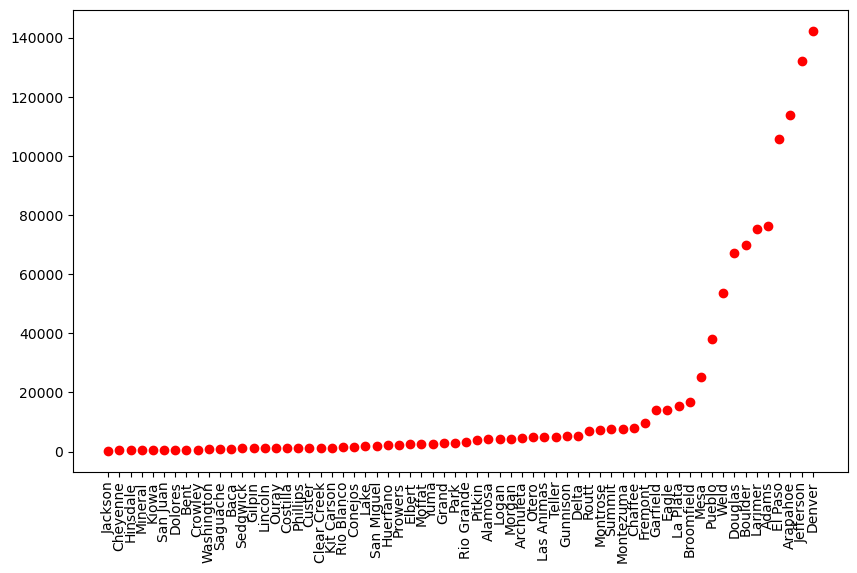

In [32]:
x_2020 = 'metric'
y_2020 = 'value'

data_2020 = list(zip(covid_county_sorted_2020[x_2020], covid_county_sorted_2020[y_2020]))
sorted_data_2020 = sorted(data_2020, key=lambda x: x[1])
x_sorted_2020, y_sorted_2020 = zip(*sorted_data_2020)

plt.figure(figsize=(10, 6))
plt.scatter(x_sorted_2020, y_sorted_2020, color='red', marker='o')
plt.xticks(rotation='vertical')
plt.show()

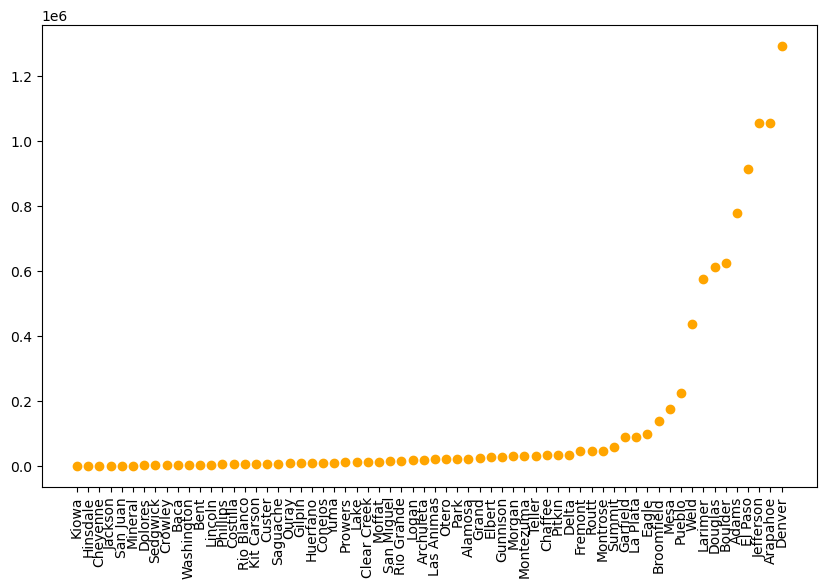

In [34]:
x_2021 = 'metric'
y_2021 = 'value'

data_2021 = list(zip(covid_county_sorted_2021[x_2021], covid_county_sorted_2021[y_2021]))
sorted_data_2021 = sorted(data_2021, key=lambda x: x[1])
x_sorted_2021, y_sorted_2021 = zip(*sorted_data_2021)

plt.figure(figsize=(10, 6))
plt.scatter(x_sorted_2021, y_sorted_2021, color='orange', marker='o')
plt.xticks(rotation='vertical')
plt.show()

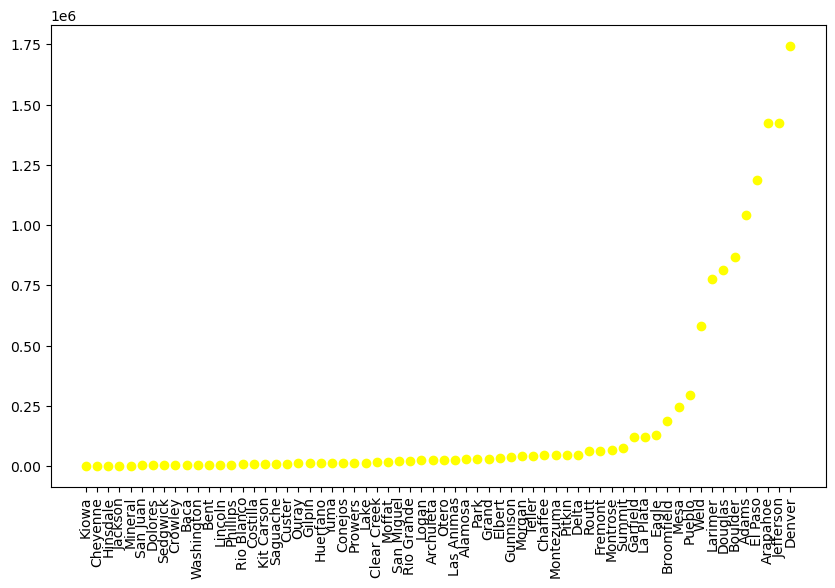

In [36]:
x_2022 = 'metric'
y_2022 = 'value'

data_2022 = list(zip(covid_county_sorted_2022[x_2022], covid_county_sorted_2022[y_2022]))
sorted_data_2022 = sorted(data_2022, key=lambda x: x[1])
x_sorted_2022, y_sorted_2022 = zip(*sorted_data_2022)

plt.figure(figsize=(10, 6))
plt.scatter(x_sorted_2022, y_sorted_2022, color='yellow', marker='o')
plt.xticks(rotation='vertical')
plt.show()

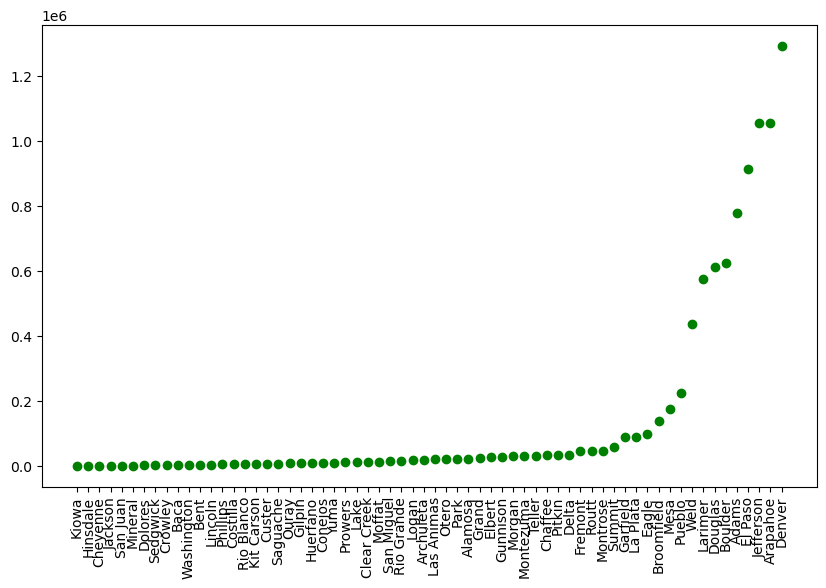

In [38]:
x_2023 = 'metric'
y_2023 = 'value'

data_2023 = list(zip(covid_county_sorted_2023[x_2023], covid_county_sorted_2023[y_2023]))
sorted_data_2023 = sorted(data_2023, key=lambda x: x[1])
x_sorted_2023, y_sorted_2023 = zip(*sorted_data_2021)

plt.figure(figsize=(10, 6))
plt.scatter(x_sorted_2023, y_sorted_2023, color='green', marker='o')
plt.xticks(rotation='vertical')
plt.show()

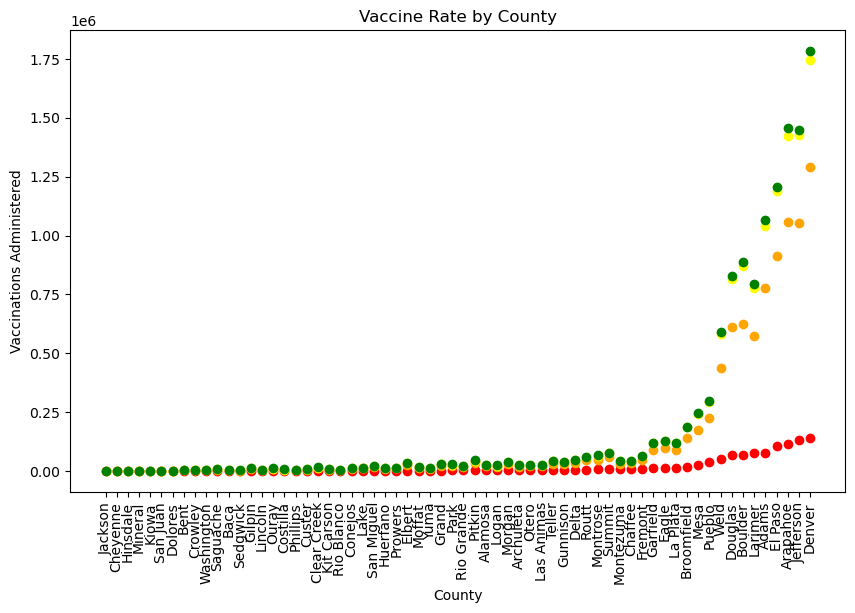

In [40]:
sorted_value = merged_county_data_sorted.sort_values('value')

# Create a scatter plot with different colors for each year
plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'yellow', 'green']

for year, color in zip(sorted_value['date'].unique(), colors):
    data_year = sorted_value[sorted_value['date'] == year]
    plt.scatter(data_year['metric'], data_year['value'], color=color, marker='o', label=year)

# Add labels and title
plt.xlabel('County')
plt.ylabel('Vaccinations Administered')
plt.title('Vaccine Rate by County')
#plt.legend(title='Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()